## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **10th November 2023 at 11:59 pm**. 

6. There is a bonus question worth 20 points, and an ultra bonus question worth 30 points. However, there is no partial credit for these questions. You will get 20 or 0 for the bonus question, and 30 or 0 for the ultra-bonus question. If everything is correct, you can score 150 out of 100 in the assignment.

## Missing value imputation
Read *Housing_missing_price.csv* as `housing_missing_price` and *Housing_complete.csv* as `housing_complete`. The datasets consist of housing features, like number of bedrooms, bathrooms, etc., and the price. Both datasets are exactly the same, except that *Housing_missing_price.csv* has some missing values of price. In this question, you will try different methods to impute the missing values of house price in the file *Housing_missing_price.csv*. You will use the prices in *Housing_complete.csv* to check the accuracy of your imputation.

Note that you **cannot** use *Housing_complete.csv* to impute missing `price` in any of the questions. *Housing_complete.csv* is just to check the accuracy of your imputation, after you have done the imputation. Before imputing the missing `price`, assume you do not have *Housing_complete.csv*.

### Number of missing values
How many values of `price` are missing in *Housing_missing_price.csv*?

*(3 points)*

### Indices of missing values
Find the row labels, where the `price` is missing. Assign those row labels as an array or a list to `index_null_price`.

*(4 points)*

### Correlation of continuous variables with `price`
Find the continuous variable having the highest correlation with `price`. Let the variable be $A_{cont}$.

*(2 points)*

### Missing value imputation using correlated continuous variable
Make a scatterplot of `price` against $A_{cont}$, with a trendline. Using the trendline, impute the missing values of `price`. 

Plot the imputed `price` vs true `price` (from *Housing_complete.csv*) and print the RMSE (*Root mean squared error*). This is to be done only for the imputed values of `price`.

*(10 points)*

**Hint:**

1. Make the trendline using non-missing values of `price` and $A_{cont}$.

2. Impute the missing values of `price` only where they are missing, i.e., at row indices `index_null_price`.

3. You may use the function below to plot the imputed price vs true price (*from Housing_complete.csv*) and print the RMSE. The function assumes that `housing_imputed_price` is the *Housing_missing_price.csv* dataset, with imputed values of `price`.

In [823]:
#Defining a function to plot the imputed values vs actual values 
def plot_actual_vs_predicted():
    fig, ax = plt.subplots(figsize=(9, 6))
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    x = housing_complete.loc[index_null_price,'price']/1e3
    y = housing_imputed_price.loc[index_null_price,'price']/1e3
    plt.scatter(x,y)
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    plt.plot(x,x,color='orange')
    plt.xlabel('Actual price',fontsize=20)
    plt.ylabel('Imputed price',fontsize=20)
    ax.xaxis.set_major_formatter('${x:,.0f}k')
    ax.yaxis.set_major_formatter('${x:,.0f}k')
    rmse = np.sqrt(((x-y).pow(2)).mean())
    print("RMSE= $"+str(np.round(rmse,2))+"k")

### Correlation of categorical variables with `price`
Split the categorical columns of the *Housing_missing_price.csv*, such that they transform into dummy variables with each category corresponding to a column of 0s and 1s. The continuous variables remain as they were in the original dataset. Name this dataset as `housing_dummy`.

Which categorical variable is the most highly correlated with `price`? Let that variable be $V_{cat}$.

*(3 + 2 points)*

**Hint:** `pd.get_dummies()`

### Missing value imputation using correlated categorical variable

Impute the missing value of the `price` of a house as the average price of all the houses that have the same value of $V_{cat}$. For example, if $V_{cat}$ is `basement`, the missing price of a house that has a basement must be imputed as the average price of all the houses that have a basement, and the missing price of a house that lacks a basement must be imputed as the average price of all the houses that lack a basement.

Plot the imputed `price` vs true `price` (from *Housing_complete.csv*) and print the RMSE (Root mean squared error). This is to be done only for the imputed values of `price`.

*(10 points)*

**Hint:** You may use the following code to get the mean house price for each level of the variable $V_{cat}$:

In [ ]:
#Replace 'Vcat' by the variable that you found to be the most correlated with 'price'
price_Vcat = housing_missing_price['price'].groupby(housing_missing_price[Vcat]).mean()
price_Vcat

### Missing value imputation using correlated continuous variable within the categories of correlated categorical variable
Execute the following code. Note that the trendlines of `price` against `area` are different based on `airconditioning`.

For each house, select the appropriate trendline to impute the missing `price`.

Plot the imputed price vs true price (from *Housing_complete.csv*) and print the RMSE (Root mean squared error).  This is to be done only for the imputed values of `price`.

*(15 points)*

In [1]:
#| echo: False

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random as rm
from sklearn import metrics
from sklearn import impute
import sklearn as sk
housing_complete = pd.read_csv('Housing_complete.csv')
housing_missing_price = pd.read_csv('Housing_missing_price.csv')

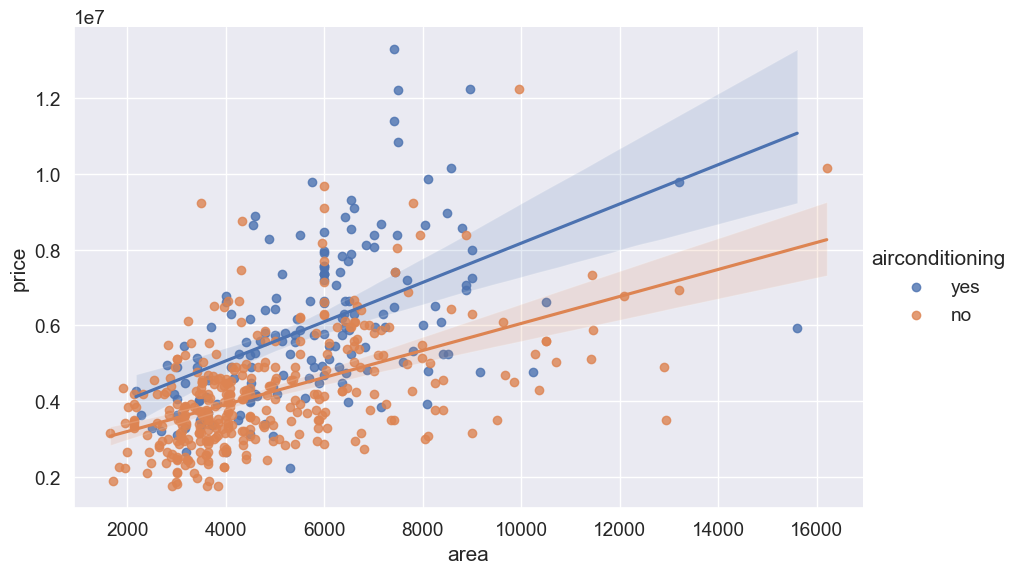

In [3]:
sns.set(font_scale=1.25)
a = sns.FacetGrid(housing_missing_price, hue = 'airconditioning',height=6, aspect=1.5)
a.map(sns.regplot,'area','price')
a.add_legend();

### **Bonus** question: Missing value imputation with KNN

*(20 points)*

#### Identifying optimal $K$ by $k$-fold cross validation

You need to impute the missing `price` using the KNN ($K$-nearest neighbor) algorithm. However, before implementing the algorithm, find the optimal value of $K$, using $k$-fold cross-validation. Use all the variables in `housing_dummy`.

Note that you **cannot** use *Housing_complete.csv* to find the optimal $K$.

Follow the $k$-fold cross validation procedure below to find the optimal $K$, i.e., the optimal number of nearest neighbors to consider when imputing missing values:

1. Remove observations with missing `price` from `housing_dummy`. Let us call the resulting DataFrame as `housing_missing_removed`.

2. Split `housing_missing_removed` into $k$-folds. Take $k=10$. Each fold will have one-tenth of the observations of `housing_missing_removed`.

3. Iterate over the $K^{th}$ potential value of $K$, where $K \in \{1,2,...,50\}$.

   A. Iterate over the $i^{th}$ fold, where $i \in \{1,2,...,10\}$

      I. Assume that the all the `price` values of the $i^{th}$ fold are missing. Impute the value of `price` for an observation in the $i^{th}$ fold as the mean `price` of the $K$-nearest neighbors to the observation, where the neighbors are from among the observations in the remaining 9 folds. 
        
      II. Compute the RMSE (Root mean squared error) for the $i^{th}$ fold. Let us denote the RMSE for $i^{th}$ fold, and considering $K$ nearest neighbors as $RMSE_{iK}$.

   B. Find the average of the 10 RMSEs obtained in 3(A). Let us denote it as $RMSE_K$, i.e., RMSE for a given value of $K$. Then, $$RMSE_K = \frac{1}{10} \sum_{i=1}^{i=10} RMSE_{iK}$$

4. The optimal value of $K$ is the one for which $RMSE_K$ is the minimum, i.e., $$K_{optimal}=\underset{K \in \{1,...,50\}}{\operatorname{\ argmin}} RMSE_K$$

**Assumption to make it a bit simpler:**
Ideally you should split the dataset randomly into $k$-folds. However, to make it simpler, you may assume that the data is already shuffled, and you may take the first $1/10^{th}$ observations to be in the $1^{st}$ fold, the next $1/10^{th}$ to be in the $2^{nd}$ fold and so on.

**More explanation** about $k$-fold cross validation and the optimal $K$:

You need to impute the missing price using the KNN (K-nearest neighbor) algorithm. However, before implementing the algorithm, find the optimal value of $K$, using $k$-fold cross-validation. This is an optimization method used for more advanced Machine Learning methods, such as KNN. In KNN, the number of neighbors, $K$, is called a hyperparameter, which cannot be optimized with a mathematical method. Therefore, it needs a more coding-based optimization method called cross-validation.  

The idea of cross-validation is to split the dataset into subsets, called folds. After that a range of $K$ values is picked. For each $K$ value in the range, the KNN imputer is created and evaluated on each fold separately, returning an RMSE value for each fold. The average value of these RMSE values is the cross-validation RMSE value of that $K$ value. 
Cross-validation is a robust method to find the best $K$ in the KNN algorithm for the data at hand because it evaluates different parts of the data separately and takes the average of all results. It is called $k$-fold cross-validation, with $k$ as the number of folds we want to use, usually 3, 5 or 10. In this problem, we will use 10-fold cross-validation. 
Note that you need nested for loops to iterate over both each $K$ value and each fold for this algorithm. 

#### Implementing KNN with optimal $K$
Using the optimal value of $K = K_{optimal}$ obtained in the previous question, impute the missing values of `price` in `housing_missing_price`. Use all the variables in `housing_dummy` for implementing the KNN algorithm. Plot the imputed price vs true price (from *Housing_complete.csv*) and print the RMSE (Root mean squared error).  This is to be done only for the imputed values of `price`.

Answer check: The RMSE obtained with KNN should be lower than that obtained with any of the earlier methods. If not, then there may be some mistake in your KNN implementation.

### **Ultra-bonus** question

*(30 points)*

Develop an algorithm to impute the missing `price`, such that it reduces the imputation RMSE to below $650k. Plot the imputed price vs true price (from *Housing_complete.csv*) and print the RMSE (Root mean squared error). This is to be done only for the imputed values of `price`.

*Note that we have not attempted to solve this question yet. We are not sure if a solution exists. However, if you find a solution, you will get 30 points.*

**Hint:** In the bonus question, all variables were given equal weights when imputing missing values with KNN. However, shouldn't some variables be given higher weight than others?


*If you think you are successful, email your solution to krish@northwestern.edu for grading.*

## Binning
Read *house_features_and_price.csv*. We will bin a couple of variables to better analyze the trend of `house_price` with those variables.

### Trend with `house_age`
Make a scatterplot of `house_price` against `house_age`, along with the trendline. What is the trend indicated by the trendline?

*(4 points)*

### Trend with bins of `house_age`

#### 
Bin `house_age` into 5 approximately equal-sized bins. 

*(3 points)*

#### 
After binning, plot the mean `house_price` against the house age bins. 

*(3 points)*

#### 
Is the trend seen with this plot different from that seen with the trendline in the previous question? If yes, then is one of the trends incorrect? Why or why not? 

*(4 points)*

#### 
Is one of the trends more informative? If yes, then which one and how?

*(4 points)*

### Trend with `number_convenience_stores`
Make a barplot to visualize the mean `house_price` against `number_convenience_stores`. 

*(3 points)*

### Trend with bins of `number_convenience_stores`
Bin `number_convenience_stores` into an appropriate number of bins such that the non-linear trend of the variation of `house_price` with the bins of `number_convenience_stores` is retained, while minimizing the number of bins.

After binning, plot the mean `house_price` against the `number_convenience_stores` bins.

*(8 points)*

### Size of `number_convenience_stores` bins
Print the size of bins obtained in the previous question. Are the bins of approximately equal size? If not, is it reasonable to have bins of unequal sizes to visualize the trend of `house_price` with `number_convenience_stores`.?

*(2 + 4 points)*

## Outliers

### Identifying outlying prices
Continue using `house_features_and_price.csv`. How many houses have outlying values of `house_price`. Are these houses extremely expensive or extremely cheap?

*(6 + 2 points)*

### Quick EDA
How are these houses (identified in the previous question as outliers) different from the houses in the rest of the dataset, which might be making them extremely expensive / extremely cheap? Explore the data and mention your hypothesis.

*(8 points)*